In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
import os

In [4]:
os.chdir('/content/drive/MyDrive/Javiera_Research')

In [5]:
!ls

cleaned_data  notebooks


# Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta

# list of variables

* `df_6mo`
  * dataframe containing 71 columns of interest, plus 1 column of patient `eid` and 2 columns that indicates the time lapse between the 2 questinnaires and the date of attending assessment center
  * contains all samples who have done both questionnaires within 6 months of attending the assessment center
  * did not clean out any `Null` or negative values 

* `df_6mo_float`
  * `df_6mo` but only with columns who are of `float64` as their `dtype`



* `missing_value_df`
  * dataframe containing the percentage of missing values in `df_6mo` for each feature 

* `df_og`
  * the original dataframe with all the samples, but only the 72 columns of interest

# load cleaned data

In [8]:
df_6mo = pd.read_csv('cleaned_data/ukb43673_74cols_6mo.csv')
df_6mo

,53-2.0,1920-2.0,1930-2.0,1940-2.0,1950-2.0,1960-2.0,1970-2.0,1980-2.0,1990-2.0,2000-2.0,2010-2.0,2020-2.0,2030-2.0,2050-2.0,2060-2.0,2070-2.0,2080-2.0,20400-0.0,20505-0.0,20506-0.0,20507-0.0,20508-0.0,20509-0.0,20510-0.0,20511-0.0,20512-0.0,20513-0.0,20514-0.0,20515-0.0,20516-0.0,20517-0.0,20518-0.0,20519-0.0,20520-0.0,21003-2.0,21023-0.0,21024-0.0,21028-0.0,21029-0.0,21030-0.0,21031-0.0,21032-0.0,21033-0.0,21034-0.0,21035-0.0,21036-0.0,21037-0.0,21038-0.0,21039-0.0,21040-0.0,21041-0.0,21042-0.0,21043-0.0,21044-0.0,21045-0.0,21047-0.0,21048-0.0,21049-0.0,21051-0.0,21052-0.0,21053-0.0,21054-0.0,21055-0.0,21056-0.0,21058-0.0,21059-0.0,21060-0.0,21061-0.0,21064-0.0,21065-0.0,21068-0.0,eid,time_lapse1,time_lapse2
0,2017-02-15,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2016-09-13,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,54.0,2017-05-11,0.0,-503.0,-500.0,-501.0,-501.0,-502.0,-501.0,-501.0,1.0,2.0,1.0,0.0,NaN,3.0,1.0,1.0,3.0,1.0,NaN,NaN,-601.0,-601.0,-601.0,-601.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-601.0,0.0,-121.0,0.0,NaN,155 days,-85 days
1,2017-09-15,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,4.0,4.0,1.0,3.0,2017-04-25,3.0,2.0,4.0,1.0,2.0,3.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0,1.0,3.0,2.0,53.0,2017-04-25,0.0,-503.0,-501.0,-500.0,-503.0,-500.0,-500.0,-501.0,1.0,3.0,10.0,1.0,3.0,1.0,1.0,2.0,5.0,1.0,NaN,NaN,-601.0,-600.0,-600.0,-600.0,-601.0,-600.0,-601.0,-601.0,-600.0,-601.0,-602.0,-601.0,0.0,1.0,0.0,NaN,143 days,143 days
2,2016-10-30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2016-09-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,51.0,2017-04-26,0.0,NaN,NaN,NaN,NaN,NaN,-500.0,-500.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,1.0,1.0,NaN,NaN,-601.0,-600.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-601.0,0.0,1.0,0.0,NaN,59 days,-178 days
3,2017-05-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2017-02-06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,57.0,2017-05-15,0.0,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0,-501.0,0.0,NaN,NaN,0.0,NaN,2.0,0.0,3.0,7.0,2.0,NaN,NaN,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-600.0,-600.0,-601.0,0.0,0.0,0.0,NaN,103 days,5 days
4,2017-07-30,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,4.0,4.0,2017-07-13,1.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,4.0,4.0,71.0,2017-05-12,0.0,NaN,NaN,NaN,NaN,NaN,-501.0,-501.0,1.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,7.0,1.0,NaN,NaN,-602.0,-602.0,-601.0,-600.0,-601.0,-600.0,-601.0,-601.0,-600.0,-600.0,-602.0,-601.0,0.0,-121.0,0.0,NaN,17 days,79 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,2016-11-22,1.0,1.0,0.0,1.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.0,2.0,1.0,2.0,2016-08-19,2.0,2.0,-818.0,1.0,2.0,-818.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,2.0,67.0,2017-05-04,-121.0,-501.0,-501.0,-501.0,-502.0,-500.0,-501.0,-501.0,0.0,NaN,NaN,0.0,NaN,5.0,4.0,4.0,10.0,2.0,NaN,NaN,-601.0,-601.0,-602.0,-600.0,-601.0,-600.0,-600.0,-601.0,-601.0,-600.0,-601.0,-602.0,1.0,1.0,0.0,6011244.0,95 days,-163 days
1489,2016-12-06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,2.0,2.0,-1.0,1.0,2016-08-22,1.0,1.0,1.0,1.0,1.0,2.0,1.0,-818.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,69.0,2017-05-17,0.0,NaN,NaN,NaN,NaN,NaN,-500.0,-501.0,0.0,NaN,NaN,0.0,NaN,1.0,2.0,1.0,5.0,1.0,NaN,NaN,-601.0,-601.0,-601.0,-600.0,-600.0,-600.0,-600.0,-601.0,-602.0,-600.0,-601.0,-600.0,0.0,0.0,0.0,6013674.0,106 days,-162 days
1490,2016-12-21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-3.0,1.0,1.0,1.0,1.0,2016-08-22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,72.0,2017-05-07,0.0,NaN,NaN,NaN,NaN,NaN,-500.0,-500.0,0.0,NaN,NaN,0.0,NaN,1.0,0.0,1.0,6.0,1.0,NaN,NaN,-601.0,-600.0,-60

# look into missing data

In [9]:
df_6mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 74 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   53-2.0       1493 non-null   object 
 1   1920-2.0     1485 non-null   float64
 2   1930-2.0     1485 non-null   float64
 3   1940-2.0     1485 non-null   float64
 4   1950-2.0     1485 non-null   float64
 5   1960-2.0     1485 non-null   float64
 6   1970-2.0     1485 non-null   float64
 7   1980-2.0     1485 non-null   float64
 8   1990-2.0     1485 non-null   float64
 9   2000-2.0     1485 non-null   float64
 10  2010-2.0     1485 non-null   float64
 11  2020-2.0     1485 non-null   float64
 12  2030-2.0     1485 non-null   float64
 13  2050-2.0     1485 non-null   float64
 14  2060-2.0     1485 non-null   float64
 15  2070-2.0     1485 non-null   float64
 16  2080-2.0     1485 non-null   float64
 17  20400-0.0    1493 non-null   object 
 18  20505-0.0    1493 non-null   float64
 19  20506-

In [10]:
# from the above, column 21047-0.0 only has 77 non-null values
# it corresponds to Number of weeks (in the last year) at work suffering because of IBS

In [11]:
df_6mo['21047-0.0']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1488   NaN
1489   NaN
1490   NaN
1491   NaN
1492   NaN
Name: 21047-0.0, Length: 1493, dtype: float64

In [24]:
# look at the fraction of null values overall
print("percent of missing values over all:", (df_6mo.isnull().sum().sum())/(len(df_6mo) * len(df_6mo.columns))*100)

percent of missing values over all: 8.821346463677342


In [23]:
# look at the fraction of null values for each column
percent_missing = (df_6mo.isnull().sum())/len(df_6mo)*100
missing_value_df = pd.DataFrame({'column_name': df_6mo.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
53-2.0,53-2.0,0.000000
1920-2.0,1920-2.0,0.535834
1930-2.0,1930-2.0,0.535834
1940-2.0,1940-2.0,0.535834
1950-2.0,1950-2.0,0.535834
...,...,...
21065-0.0,21065-0.0,0.000000
21068-0.0,21068-0.0,0.000000
eid,eid,0.334896
time_lapse1,time_lapse1,0.000000


In [71]:
# sort to see which columns have the most missing values
missing_value_df.sort_values('percent_missing', ascending=False).head(50)

,column_name,percent_missing
21047-0.0,21047-0.0,94.842599
21045-0.0,21045-0.0,87.742800
21039-0.0,21039-0.0,76.959143
21037-0.0,21037-0.0,71.935700
21036-0.0,21036-0.0,71.935700
21029-0.0,21029-0.0,48.091092
21030-0.0,21030-0.0,48.091092
21031-0.0,21031-0.0,48.091092
21032-0.0,21032-0.0,48.091092
21028-0.0,21028-0.0,48.091092


In [77]:
!ls

cleaned_data  notebooks


In [78]:
missing_value_df.sort_values('percent_missing', ascending=False).to_csv("cleaned_data/missing_value_df.csv", 
                                                                        index = False)

# look into into age

age has the feature ID `21003-2.0`

## 6 months data

In [33]:
df_6mo['21003-2.0'].isnull().sum()
# our age columns does not have any missing values

0

Text(0, 0.5, 'count')

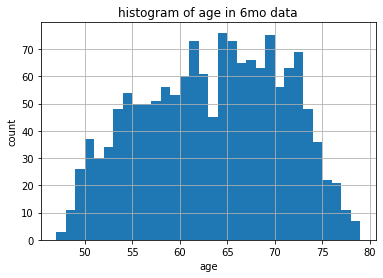

In [41]:
df_6mo['21003-2.0'].hist(bins=int(max(df_6mo['21003-2.0']) - min(df_6mo['21003-2.0'])))
  # make a bin for each integer age
plt.title('histogram of age in 6mo data')
plt.xlabel('age')
plt.ylabel('count')

## entire data

In [42]:
# to get the age distribution from the entire dataset (the smaller one with only 72 features we are interested in)

In [44]:
# notebook saved on Greene cluster 

# "prefer not to answer"

In [45]:
df_6mo

,53-2.0,1920-2.0,1930-2.0,1940-2.0,1950-2.0,1960-2.0,1970-2.0,1980-2.0,1990-2.0,2000-2.0,2010-2.0,2020-2.0,2030-2.0,2050-2.0,2060-2.0,2070-2.0,2080-2.0,20400-0.0,20505-0.0,20506-0.0,20507-0.0,20508-0.0,20509-0.0,20510-0.0,20511-0.0,20512-0.0,20513-0.0,20514-0.0,20515-0.0,20516-0.0,20517-0.0,20518-0.0,20519-0.0,20520-0.0,21003-2.0,21023-0.0,21024-0.0,21028-0.0,21029-0.0,21030-0.0,21031-0.0,21032-0.0,21033-0.0,21034-0.0,21035-0.0,21036-0.0,21037-0.0,21038-0.0,21039-0.0,21040-0.0,21041-0.0,21042-0.0,21043-0.0,21044-0.0,21045-0.0,21047-0.0,21048-0.0,21049-0.0,21051-0.0,21052-0.0,21053-0.0,21054-0.0,21055-0.0,21056-0.0,21058-0.0,21059-0.0,21060-0.0,21061-0.0,21064-0.0,21065-0.0,21068-0.0,eid,time_lapse1,time_lapse2
0,2017-02-15,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2016-09-13,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,54.0,2017-05-11,0.0,-503.0,-500.0,-501.0,-501.0,-502.0,-501.0,-501.0,1.0,2.0,1.0,0.0,NaN,3.0,1.0,1.0,3.0,1.0,NaN,NaN,-601.0,-601.0,-601.0,-601.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-601.0,0.0,-121.0,0.0,NaN,155 days,-85 days
1,2017-09-15,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,4.0,4.0,1.0,3.0,2017-04-25,3.0,2.0,4.0,1.0,2.0,3.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0,1.0,3.0,2.0,53.0,2017-04-25,0.0,-503.0,-501.0,-500.0,-503.0,-500.0,-500.0,-501.0,1.0,3.0,10.0,1.0,3.0,1.0,1.0,2.0,5.0,1.0,NaN,NaN,-601.0,-600.0,-600.0,-600.0,-601.0,-600.0,-601.0,-601.0,-600.0,-601.0,-602.0,-601.0,0.0,1.0,0.0,NaN,143 days,143 days
2,2016-10-30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2016-09-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,51.0,2017-04-26,0.0,NaN,NaN,NaN,NaN,NaN,-500.0,-500.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,1.0,1.0,NaN,NaN,-601.0,-600.0,-600.0,-600.0,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-601.0,0.0,1.0,0.0,NaN,59 days,-178 days
3,2017-05-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2017-02-06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,57.0,2017-05-15,0.0,-500.0,-500.0,-500.0,-500.0,-500.0,-500.0,-501.0,0.0,NaN,NaN,0.0,NaN,2.0,0.0,3.0,7.0,2.0,NaN,NaN,-601.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-600.0,-601.0,-600.0,-600.0,-601.0,0.0,0.0,0.0,NaN,103 days,5 days
4,2017-07-30,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,4.0,4.0,2017-07-13,1.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,4.0,4.0,71.0,2017-05-12,0.0,NaN,NaN,NaN,NaN,NaN,-501.0,-501.0,1.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,7.0,1.0,NaN,NaN,-602.0,-602.0,-601.0,-600.0,-601.0,-600.0,-601.0,-601.0,-600.0,-600.0,-602.0,-601.0,0.0,-121.0,0.0,NaN,17 days,79 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,2016-11-22,1.0,1.0,0.0,1.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.0,2.0,1.0,2.0,2016-08-19,2.0,2.0,-818.0,1.0,2.0,-818.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,2.0,67.0,2017-05-04,-121.0,-501.0,-501.0,-501.0,-502.0,-500.0,-501.0,-501.0,0.0,NaN,NaN,0.0,NaN,5.0,4.0,4.0,10.0,2.0,NaN,NaN,-601.0,-601.0,-602.0,-600.0,-601.0,-600.0,-600.0,-601.0,-601.0,-600.0,-601.0,-602.0,1.0,1.0,0.0,6011244.0,95 days,-163 days
1489,2016-12-06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,2.0,2.0,-1.0,1.0,2016-08-22,1.0,1.0,1.0,1.0,1.0,2.0,1.0,-818.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,69.0,2017-05-17,0.0,NaN,NaN,NaN,NaN,NaN,-500.0,-501.0,0.0,NaN,NaN,0.0,NaN,1.0,2.0,1.0,5.0,1.0,NaN,NaN,-601.0,-601.0,-601.0,-600.0,-600.0,-600.0,-600.0,-601.0,-602.0,-600.0,-601.0,-600.0,0.0,0.0,0.0,6013674.0,106 days,-162 days
1490,2016-12-21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-3.0,1.0,1.0,1.0,1.0,2016-08-22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,72.0,2017-05-07,0.0,NaN,NaN,NaN,NaN,NaN,-500.0,-500.0,0.0,NaN,NaN,0.0,NaN,1.0,0.0,1.0,6.0,1.0,NaN,NaN,-601.0,-600.0,-60

In [46]:
# just by eye, we can see that we get a lot of negative values
# some -602, some -602, some -121, etc.
# but if we look into some of the columns, obviously the negative number does not make sense
# plan: mannually look into each column to determin if negative values make sense for this column or not
# then treat all negative values like missing values and filter them out

In [53]:
df_6mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 74 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   53-2.0       1493 non-null   object 
 1   1920-2.0     1485 non-null   float64
 2   1930-2.0     1485 non-null   float64
 3   1940-2.0     1485 non-null   float64
 4   1950-2.0     1485 non-null   float64
 5   1960-2.0     1485 non-null   float64
 6   1970-2.0     1485 non-null   float64
 7   1980-2.0     1485 non-null   float64
 8   1990-2.0     1485 non-null   float64
 9   2000-2.0     1485 non-null   float64
 10  2010-2.0     1485 non-null   float64
 11  2020-2.0     1485 non-null   float64
 12  2030-2.0     1485 non-null   float64
 13  2050-2.0     1485 non-null   float64
 14  2060-2.0     1485 non-null   float64
 15  2070-2.0     1485 non-null   float64
 16  2080-2.0     1485 non-null   float64
 17  20400-0.0    1493 non-null   object 
 18  20505-0.0    1493 non-null   float64
 19  20506-

In [58]:
# grab only the columns with type float
df_6mo.select_dtypes(include=['float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 69 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1920-2.0   1485 non-null   float64
 1   1930-2.0   1485 non-null   float64
 2   1940-2.0   1485 non-null   float64
 3   1950-2.0   1485 non-null   float64
 4   1960-2.0   1485 non-null   float64
 5   1970-2.0   1485 non-null   float64
 6   1980-2.0   1485 non-null   float64
 7   1990-2.0   1485 non-null   float64
 8   2000-2.0   1485 non-null   float64
 9   2010-2.0   1485 non-null   float64
 10  2020-2.0   1485 non-null   float64
 11  2030-2.0   1485 non-null   float64
 12  2050-2.0   1485 non-null   float64
 13  2060-2.0   1485 non-null   float64
 14  2070-2.0   1485 non-null   float64
 15  2080-2.0   1485 non-null   float64
 16  20505-0.0  1493 non-null   float64
 17  20506-0.0  1493 non-null   float64
 18  20507-0.0  1493 non-null   float64
 19  20508-0.0  1493 non-null   float64
 20  20509-0.

In [68]:
df_6mo_float = df_6mo.select_dtypes(include=['float64'])

In [69]:
# calculate the sum of 1's (trues) and the percentage of them
number_negative = (df_6mo_float < 0).sum()
percent_negative = ((df_6mo_float < 0).sum())/len(df_6mo)*100
negative_value_df = pd.DataFrame({'column_name': df_6mo_float.columns,
                                  'number_negative' : number_negative,
                                  'percent_negative': percent_negative})
negative_value_df

,column_name,number_negative,percent_negative
1920-2.0,1920-2.0,22,1.473543
1930-2.0,1930-2.0,18,1.205626
1940-2.0,1940-2.0,66,4.420630
1950-2.0,1950-2.0,44,2.947086
1960-2.0,1960-2.0,33,2.210315
...,...,...,...
21061-0.0,21061-0.0,1493,100.000000
21064-0.0,21064-0.0,119,7.970529
21065-0.0,21065-0.0,224,15.003349
21068-0.0,21068-0.0,6,0.401875


In [73]:
df_6mo['21060-0.0'].unique()

array([-600., -602., -601.])

In [70]:
negative_value_df.sort_values('percent_negative', ascending = False).head(20)

,column_name,number_negative,percent_negative
21060-0.0,21060-0.0,1493,100.000000
21052-0.0,21052-0.0,1493,100.000000
21059-0.0,21059-0.0,1493,100.000000
21058-0.0,21058-0.0,1493,100.000000
21056-0.0,21056-0.0,1493,100.000000
21055-0.0,21055-0.0,1493,100.000000
21054-0.0,21054-0.0,1493,100.000000
21053-0.0,21053-0.0,1493,100.000000
21051-0.0,21051-0.0,1493,100.000000
21049-0.0,21049-0.0,1493,100.000000
